In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
pd.set_option('display.max_rows', 200)

In [3]:
churn_df=pd.read_csv("DATA_Customer-Churn.csv")
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churn_df['TotalCharges']=pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [5]:
churn_df['TotalCharges'].fillna((churn_df['TotalCharges'].mean()), inplace=True)

In [6]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
X=churn_df[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [8]:
y=churn_df.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [10]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [12]:
X_sm

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.850000,29.850000
1,34,0,56.950000,1889.500000
2,2,0,53.850000,108.150000
3,45,0,42.300000,1840.750000
4,2,0,70.700000,151.650000
...,...,...,...,...
10343,11,0,41.113806,439.500233
10344,1,0,19.148820,19.148820
10345,68,0,99.955042,6869.020940
10346,10,0,71.835971,811.647006


In [13]:
y_sm

0         No
1         No
2        Yes
3         No
4        Yes
        ... 
10343    Yes
10344    Yes
10345    Yes
10346    Yes
10347    Yes
Name: Churn, Length: 10348, dtype: object

## Split the X_sm and y

In [14]:
from sklearn.model_selection import train_test_split

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_sm_train = pd.DataFrame(X_sm_train, columns= X_sm.columns)
X_sm_test = pd.DataFrame(X_sm_test, columns= X_sm.columns)

In [15]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_sm_train)
# transform training data
X_sm_train_norm = norm.transform(X_sm_train)
# transform testing data
X_sm_test_norm = norm.transform(X_sm_test)

,Error_metric,Train,Test
0,Accuracy,0.732182,0.742029
1,Precision,0.719310,0.735160
2,Recall,0.758545,0.767398


Confusion matrix for the train set
[[2932 1221]
 [ 996 3129]]


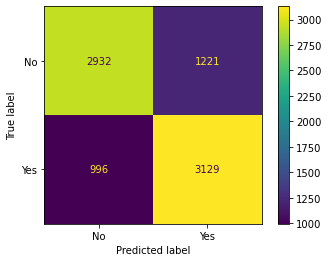



Confusion matrix for the test set
[[731 290]
 [244 805]]


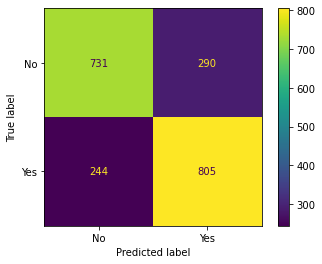

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_sm_train_norm)

X_sm_train_mod = trans.transform(X_sm_train_norm)
X_sm_test_mod  = trans.transform(X_sm_test_norm)

log_model.fit(X_sm_train_mod, y_sm_train)

y_pred_train_log = log_model.predict(X_sm_train_mod)
y_pred_test_log = log_model.predict(X_sm_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_train, y_pred_train_log),
                                         precision_score(y_sm_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_sm_train, y_pred_train_log, pos_label="Yes")],
                               'Test': [accuracy_score(y_sm_test, y_pred_test_log),
                                        precision_score(y_sm_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_sm_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_sm_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_sm_train_mod,y_sm_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_sm_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_sm_test_mod,y_sm_test, values_format = 'd')
plt.show()

- with upsampling the logistic regression is very bad